In [21]:
import numpy as np
import matplotlib.pyplot as plt

from split_circles import split_circles, split_circles_adaptive

# difine edge points

In [22]:
np.random.seed(0)

radii = [1, 2, 3, 4, 5]


xs = []
ys = []
for radius in radii:
    points_num = radius * 20
    angle = np.linspace(0, 2 * np.pi, points_num)  # 生成100个角度值，从0到2π
    # 根据圆的参数方程计算圆上的点
    xs.append(radius * np.cos(angle) + np.random.normal(0, 0.03, points_num))
    ys.append(radius * np.sin(angle) + np.random.normal(0, 0.03, points_num))
x = np.concatenate(xs, axis=-1)
y = np.concatenate(ys, axis=-1)
xy = np.stack([x, y], axis=1)
x.shape, y.shape, xy.shape

((300,), (300,), (300, 2))

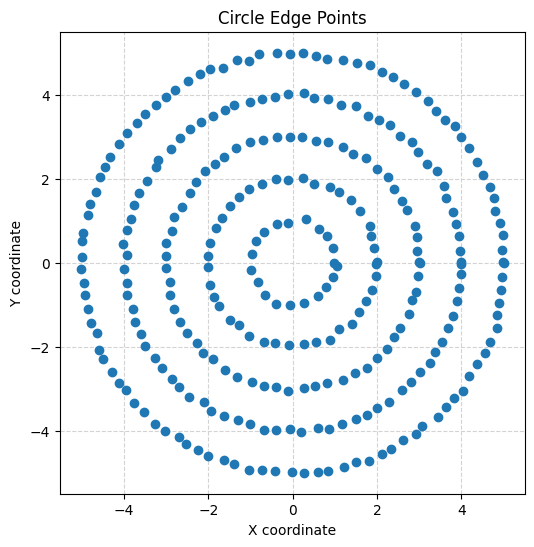

In [23]:
# 可视化圆上的点
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o')  # 使用散点图表示圆上的点
plt.title('Circle Edge Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(color='lightgray', linestyle='--')
plt.show()

# 分开一个一个的圆环

## 距离分割

In [24]:
group_circles = split_circles(xy, circle_nums = 5, min_group_size=5, momentum=0.9)
len(group_circles)

5

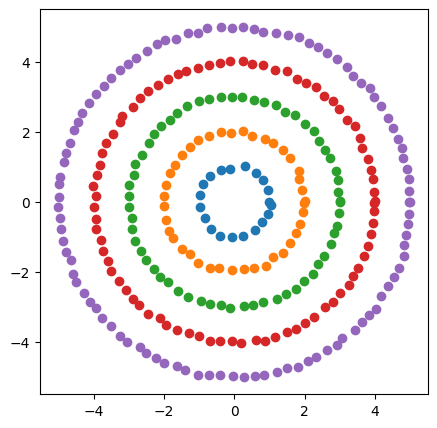

In [25]:
plt.figure(figsize=(5, 5))
for group_circle in group_circles:
    plt.scatter(group_circle[:, 0], group_circle[:, 1])

In [26]:
group_circles = split_circles_adaptive(xy, circle_nums = 5, init_threshold_range = 0.5, min_group_size=5, momentum=0.9)
len(group_circles)

try time 1: threshold_range = 0.5, detect_circle_nums = 5


5

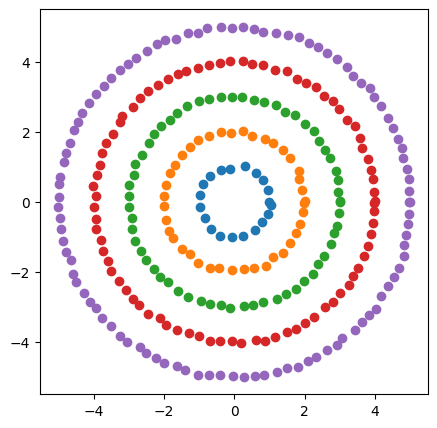

In [27]:
plt.figure(figsize=(5, 5))
for group_circle in group_circles:
    plt.scatter(group_circle[:, 0], group_circle[:, 1])

## 聚类

In [8]:
from sklearn.cluster import AgglomerativeClustering, OPTICS, DBSCAN
from sklearn.neighbors import kneighbors_graph

### AgglomerativeClustering 层次聚类

In [9]:
connectivity = kneighbors_graph(
    xy, n_neighbors=3, include_self=False
)
connectivity

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 900 stored elements and shape (300, 300)>

In [10]:
# n_clusters: The number of clusters to find.
# metric: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.
#         If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed as input for the fit method.
# connectivity: Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data.
#         This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix,
#         such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
# linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
#         Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#         ‘ward’ minimizes the variance of the clusters being merged.
#         ‘average’ uses the average of the distances of each observation of the two sets.
#         ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
#         ‘single’ uses the minimum of the distances between all observations of the two sets.
agglo = AgglomerativeClustering(
    n_clusters=5,
    metric="cityblock",
    connectivity=connectivity,
    linkage="average",
)
agglo

AgglomerativeClustering(connectivity=<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 900 stored elements and shape (300, 300)>,
                        linkage='average', metric='cityblock', n_clusters=5)

In [11]:
agglo_circles_preds = agglo.fit_predict(xy)
np.unique(agglo_circles_preds)

c:\miniconda3\envs\cv\Lib\site-packages\sklearn\cluster\_agglomerative.py:594: UserWarning: the number of connected components of the connectivity matrix is 5 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


array([0, 1, 2, 3, 4])

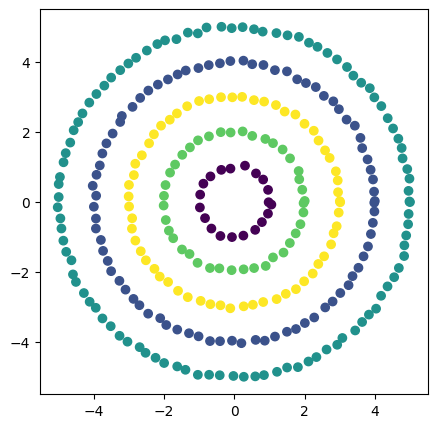

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=agglo_circles_preds)

### OPTICS 密度聚类

In [13]:
# min_samples: 将某个点视为核心点的邻域中的样本数。
# xi: float between 0 and 1, default=0.05
#   Determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
#   an absolute number or a fraction of the number of samples (rounded to be at least 2)
#   小数: 一个类别至少占总数的比例
#   整数: 一个类别至少的个数
optics = OPTICS(
    min_samples=5,
    xi=0.05,
    min_cluster_size=0.1,
)
optics

OPTICS(min_cluster_size=0.1)

In [14]:
optics_circles_preds = optics.fit_predict(xy)
np.unique(optics_circles_preds)

array([-1,  0,  1,  2,  3])

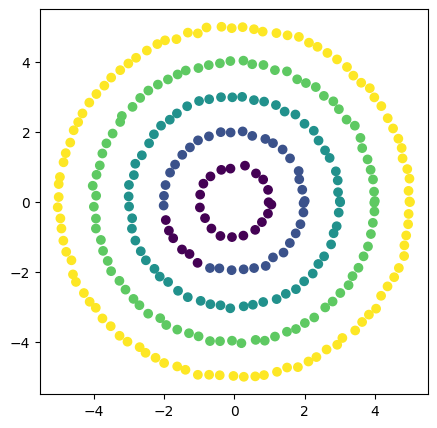

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=optics_circles_preds)

### DBSCAN 密度聚类

In [16]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan = DBSCAN(eps=0.8)
dbscan

DBSCAN(eps=0.8)

In [17]:
dbscan_circles_preds = dbscan.fit_predict(xy)
np.unique(dbscan_circles_preds)

array([0, 1, 2, 3, 4])

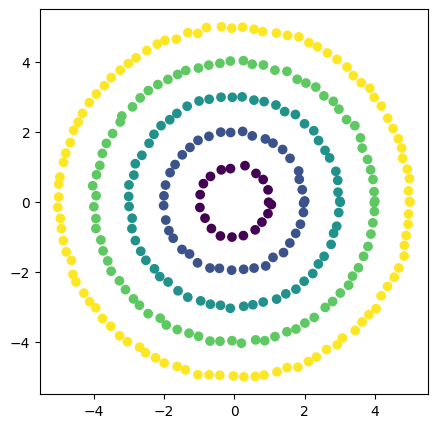

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c=dbscan_circles_preds)